# Bagging (Bootstrap Aggeration)

![resim_2023-04-16_165005431](resim_2023-04-16_165005431.png)


## Bagging: Training
![resim_2023-04-16_165057643](resim_2023-04-16_165057643.png)


## Bagging: Prediction
![resim_2023-04-16_165144922](resim_2023-04-16_165144922.png)


## Bagging classifier in sklearn (Breast-Cancer dataset)

In [1]:
import pandas as pd
wbc = pd.read_csv('datasets/wbc.csv')
wbc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# Import models and utility functions

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,                                          stratify=y,                                                                        random_state=SEED)
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

In [ ]:
Accuracy of Bagging Classifier: 0.936

## Define the bagging classifier
We'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [3]:
import pandas as pd
indian_liver_patient_preprocessed = pd.read_csv('indian_liver_patient_preprocessed.csv')
indian_liver_patient_preprocessed

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,578,0.938909,-0.452462,-0.495414,0.857336,-0.333977,-0.263863,-0.536763,-1.938290,-1.807188,1,0
575,579,-0.295067,-0.436391,-0.495414,-0.794596,-0.252021,-0.274222,-0.444487,0.077462,0.478949,1,1
576,580,0.445318,-0.404249,-0.459878,-0.190532,-0.180993,-0.212067,-0.075383,0.077462,0.165780,1,1
577,581,-0.850356,-0.323893,-0.353271,-0.441198,-0.284804,-0.270769,0.293722,0.329431,0.165780,1,1


In [2]:
import pandas as pd
indian_liver_patient = pd.read_csv('indian_liver_patient.csv')
indian_liver_patient

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In the following exercise, we'll train bc and evaluate its test set performance.

## Evaluate Bagging performance
Now that we instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

In [ ]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

In [ ]:
<script.py> output:
    Test set accuracy of bc: 0.67

A single tree dt would have achieved an accuracy of 63% which is 4% lower than bc's accuracy!

## Out Of Bag (OOB)
- On average, for each model, %63 of the training instances are sampled.
- The remaining %37 constitute the OOB instances.

![resim_2023-04-16_211015897](resim_2023-04-16_211015897.png)


## OOB Evaluation in sklearn(Breast Cancer Dataset)

In [ ]:
import pandas as pd
wbc = pd.read_csv('datasets/wbc.csv')
wbc

In [ ]:
# Import models and split utility function

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifierfrom sklearn.metrics 
import accuracy_scorefrom sklearn.model_selection 
import train_test_split

# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.3,                                                     stratify= y,                                                                       random_state=SEED)
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4,                        min_samples_leaf=0.16, random_state=SEED)


# Instantiate a BaggingClassifier 'bc'; set oob_score = True 
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,                       oob_score=True, n_jobs=-1)

# Fit 'bc' to the training set
bc.fit(X_train, y_train)

# Predict the test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Extract the OOB accuracy from 'bc'
oob_accuracy = bc.oob_score_

# Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

In [ ]:
Test set accuracy: 0.936

In [ ]:
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))OOB accuracy: 0.925

In [ ]:
OOB accuracy: 0.925

The two obtained accuracies are pretty close though not exactly equal.

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)

In the following exercise, we'll train bc and compare its test set accuracy to its OOB accuracy.

## OOB Score vs Test Set Score
Now that we instantiated bc, we will fit it to the training set and evaluate its test set and OOB accuracies.

In [ ]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

In [ ]:
<script.py> output:
    Test set accuracy: 0.698, OOB accuracy: 0.702

The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%

# Random Forests
## Random Forests: Training
![resim_2023-04-17_010816982](resim_2023-04-17_010816982.png)


## Random Forests: Prediction
![resim_2023-04-17_010923950](resim_2023-04-17_010923950.png)


## Random Forests Regressor in sklearn (Auto Dataset)

In [1]:
import pandas as pd
auto = pd.read_csv('datasets/auto.csv')
auto

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,US,15.0
388,27.0,151.0,90,2950,17.3,US,10.0
389,29.5,98.0,68,2135,16.6,Asia,10.0
390,17.5,250.0,110,3520,16.4,US,15.0


In [ ]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,                                                                                test_size=0.3, random_state=SEED)

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98

## Feature Importance in Sklearn

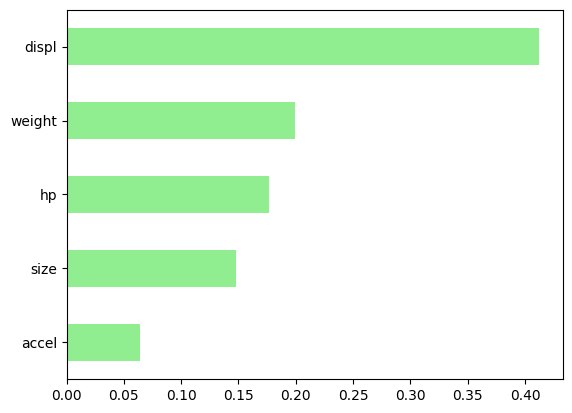

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load data and split into features and target
data = pd.read_csv('datasets/auto.csv')
X = data.drop('mpg', axis=1)
y = data['mpg']

# Remove non-numeric column
X = X.select_dtypes(include=[float, int])

# Train a random forest model
rf = RandomForestRegressor()
rf.fit(X, y)

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Sort importances_rf                                   
sorted_importances_rf = importances_rf.sort_values()   

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

In [1]:
import pandas as pd
bikes = pd.read_csv('datasets/bikes.csv')
bikes

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,19,0,1,0.80,0.49,0.1343,452,14487,8,1,1,0,0
1484,20,0,1,0.80,0.49,0.1343,356,14488,8,1,1,0,0
1485,21,0,1,0.76,0.58,0.1940,303,14489,8,1,1,0,0
1486,22,0,1,0.76,0.58,0.1940,277,14490,8,1,1,0,0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

bikes = pd.read_csv("datasets/bikes.csv")
X_test, y_test = train_test_split(bikes, test_size=0.2, random_state=42)

print(len(X_test))
print(len(y_test))

X_test.to_csv("train_seti.csv", index=False)
y_test.to_csv("test_seti.csv", index=False)

1190
298


## Train an RF regressor
In the following exercises we'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, we will be using the random forests algorithm. As a first step, we'll define a random forests regressor and fit it to the training set.

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)    

Next comes the test set RMSE evaluation part.

## Evaluate the RF regressor

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

In [ ]:
<script.py> output:
    Test set RMSE of rf: 51.86

The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART

## Visualizing features importances

In [ ]:
# Import pandas module
import pandas as pd

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

![resim_2023-04-20_132939920](resim_2023-04-20_132939920.png)


Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%